<a href="https://colab.research.google.com/github/Jiablero/notebooks/blob/master/Stepik_ML_contest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np


In [0]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')

In [0]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')
events_data['day'] = events_data.date.dt.date

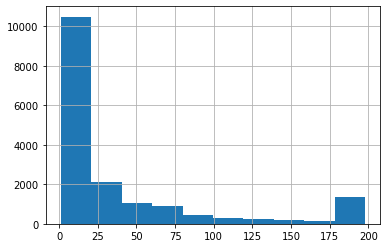

In [0]:
events_data[events_data.action == 'passed'] \
  .groupby('user_id', as_index = False) \
  .agg({'step_id': 'count'}) \
  .rename(columns = {'step_id': 'passed_steps'}).passed_steps.hist()

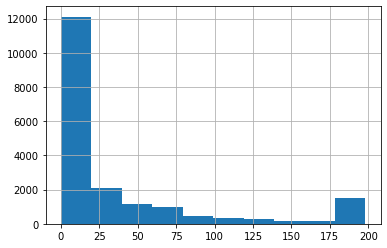

In [0]:
events_data.pivot_table(index = 'user_id', 
                 columns = 'action', 
                 values = 'step_id', 
                 aggfunc = 'count', 
                 fill_value = 0) \
                 .reset_index() \
                 .discovered.hist()

In [0]:
users_events_data = events_data.pivot_table(index = 'user_id', 
                 columns = 'action', 
                 values = 'step_id', 
                 aggfunc = 'count', 
                 fill_value = 0) \
                 .reset_index()

In [0]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [0]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data['day'] = submissions_data.date.dt.date

In [0]:
users_scores = submissions_data.pivot_table(index = 'user_id', 
                 columns = 'submission_status', 
                 values = 'step_id', 
                 aggfunc = 'count', 
                 fill_value = 0) \
                 .reset_index()

In [0]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [0]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
  .groupby('user_id').timestamp.apply(list) \
  .apply(np.diff).values

In [0]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0 ))

In [0]:
gap_data = gap_data / (24 * 60 * 60) # sec to days

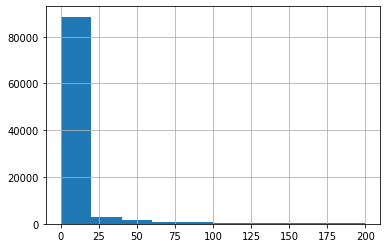

In [0]:
gap_data[gap_data < 200].hist()

In [0]:
gap_data.quantile(0.90)

18.325995370370403

In [0]:
submissions_data.step_id.max()

120745

In [0]:
karpov_data = submissions_data[(submissions_data.step_id == submissions_data.step_id.max())]
karpov_data[karpov_data.timestamp == karpov_data.timestamp.min()]

,step_id,timestamp,submission_status,user_id,date,day
197138,120745,1471447725,correct,3504,2016-08-17 15:28:45,2016-08-17


In [0]:
karpov_data = submissions_data.pivot_table(index = 'user_id', 
                 columns = 'submission_status', 
                 values = 'step_id', 
                 aggfunc = 'count', 
                 fill_value = 0) \
                 .reset_index()


In [0]:
karpov_data[(karpov_data.wrong >= 400) & (karpov_data.correct >= 400)]

submission_status,user_id,correct,wrong
439,1046,421,513


In [0]:
users_data = events_data.groupby('user_id', as_index= False) \
  .agg({'timestamp': 'max'}).rename(columns={'timestamp': 'last_timestamp'})

In [0]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [0]:
now = 1526772811
drop_out_treshold = 30 * 24 * 60 * 60

In [0]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_treshold

In [0]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [0]:
users_data = users_data.merge(users_scores, on = 'user_id', how='outer')

In [0]:
users_data = users_data.fillna(0)

In [0]:
users_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
5,8,1481466913,True,9.0,21.0
6,9,1484999497,True,0.0,0.0
7,11,1526140625,False,0.0,0.0
8,14,1436368676,True,0.0,1.0
9,16,1513162585,True,77.0,106.0


In [0]:
users_data = users_data.merge(users_events_data, how='outer')

In [0]:
users_days = events_data.groupby('user_id').day.nunique()
users_days.head()

user_id
1    1
2    2
3    7
5    2
7    1
Name: day, dtype: int64

In [0]:
users_days.to_frame().reset_index()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [0]:
users_data = users_data.merge(users_days, on = 'user_id', how='outer')

In [0]:
users_data.user_id.nunique()

19234

In [0]:
events_data.user_id.nunique()

19234

In [0]:
users_data['passed_course'] = users_data.passed > 170

In [0]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [0]:
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [0]:
100 * 1425 / 17809

8.001572238755685

In [0]:
users_data.head(20)

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False
5,8,1481466913,True,9.0,21.0,109,84,37,156,2,False
6,9,1484999497,True,0.0,0.0,3,3,0,4,1,False
7,11,1526140625,False,0.0,0.0,1,0,1,1,1,False
8,14,1436368676,True,0.0,1.0,4,3,1,9,1,False
9,16,1513162585,True,77.0,106.0,196,196,108,651,21,True


In [0]:
users_data.to_csv('stepik_users_data.zip', compression  = dict(method = 'zip', archive_name = 'stepik_users_data.zip'))

FileNotFoundError: ignored